In [29]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

### generating data...

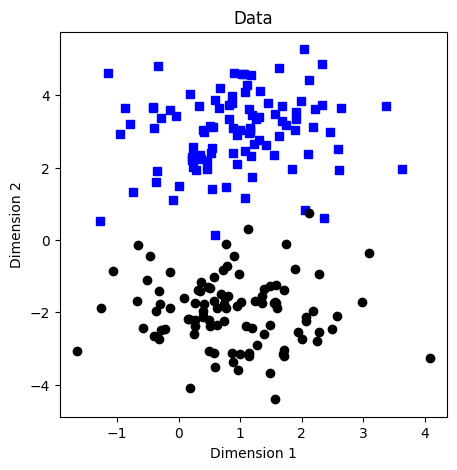

In [30]:
nPerClust = 100
blur = 1

A = [ 1, 3 ]
B = [ 1, -2 ]

a = [ A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur ]

labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))
data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
plt.title('Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [31]:
def buildModel(learningRate):
    ANNclassify = nn.Sequential(
        nn.Linear(2,16),    # input layer
        nn.ReLU(),          # activation unit
        nn.Linear(16,1),    # hidden layer
        nn.ReLU(),          # activation unit
        nn.Linear(1,1),     # output unit
        nn.Sigmoid(),       # final activation unit
    )

    lossfn = nn.BCELoss()
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

    return ANNclassify, lossfn, optimizer

In [32]:
Nepochs = 1000
def trainModel(model,lossfn,optimizer,data,labels):
    losses = torch.zeros(Nepochs)
    for epoch in range(Nepochs):
        optimizer.zero_grad()
        yHat = model(data)
        loss = lossfn(yHat,labels)
        losses[epoch] = loss.item()
        loss.backward()
        optimizer.step()

    # compute predictions and report accuracy
    predictions = model(data)
    totalacc = 100*torch.mean(((predictions>0.5) == labels).float())

    return predictions,losses,totalacc,model

Total Accuracy: 98.50%


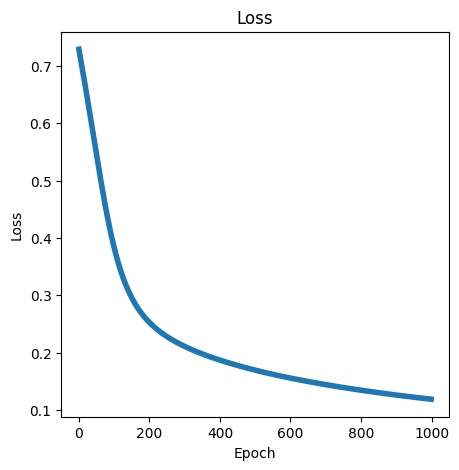

In [33]:
model,lossfn,optimizer = buildModel(0.01)
predictions,losses,totalacc,model = trainModel(model,lossfn,optimizer,data,labels)
print(f'Total Accuracy: {totalacc:.2f}%')

fig = plt.figure(figsize=(5,5))
plt.plot(losses,linewidth=4)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## now, test away

In [34]:
learningRates = np.linspace(0.001,0.1,50)

accByLR = []
allLosses = np.zeros((len(learningRates),Nepochs))

for i,lr in enumerate(learningRates):
    model,lossfn,optimizer = buildModel(lr)
    predictions,losses,totalacc,model = trainModel(model,lossfn,optimizer,data,labels)
    accByLR.append(totalacc)
    allLosses[i,:] = losses

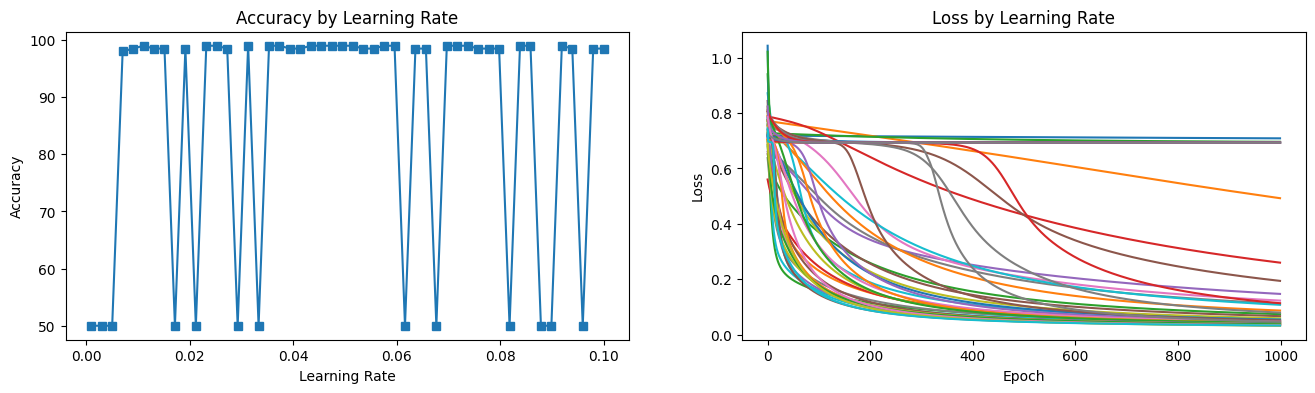

In [35]:
fig,ax = plt.subplots(1,2,figsize=(16,4))

ax[0].plot(learningRates,accByLR,'s-')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by Learning Rate')

ax[1].plot(allLosses.T)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Loss by Learning Rate')

plt.show()